In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Read the Data

In [3]:
credit_df = pd.read_csv(r'E:\BIA\assignments\case_study\credit_card_fraud\credit_card_fraud.csv')
credit_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?
0,1,1,2005,9,6,19:18:00,$16.68,Swipe Transaction,Ross Package Store,Berkley,MI,48072.0,5921,No
1,1,1,2005,9,9,08:56:00,$224.70,Online Transaction,Digital Delivery Company 7,ONLINE,NaN,NaN,4899,No
2,1,1,2005,9,9,16:23:00,$145.61,Online Transaction,Travel Booking Company 4,ONLINE,NaN,NaN,4722,No
3,1,1,2005,9,9,16:35:00,$229.21,Swipe Transaction,Car Rental Company 4,Belleville,MI,48111.0,3405,No
4,1,1,2005,9,9,19:55:00,$11.00,Swipe Transaction,Supermarket Chain 3,Southfield,MI,48075.0,5411,No


In [4]:
credit_df.shape

(691920, 14)

In [6]:
credit_df.dtypes

User                int64
Card                int64
Year                int64
Month               int64
Day                 int64
Time               object
Amount             object
Use Chip           object
Merchant Name      object
Merchant City      object
Merchant State     object
Zip               float64
MCC                 int64
Is Fraud?          object
dtype: object

##

1. Include date column
2. change amount to float
3. change zip to string
4. change MCC to string
5. change is Fraud to boolean (0/1)

In [9]:
credit_df_cleaned = credit_df.copy()
credit_df_cleaned['date_time'] = pd.to_datetime(credit_df_cleaned['Year'].astype(str) + "-" + \
credit_df_cleaned['Month'].astype(str) + "-" + credit_df_cleaned['Day'].astype(str) + " " + \
credit_df_cleaned['Time'])
credit_df_cleaned.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?,date_time
0,1,1,2005,9,6,19:18:00,$16.68,Swipe Transaction,Ross Package Store,Berkley,MI,48072.0,5921,No,2005-09-06 19:18:00
1,1,1,2005,9,9,08:56:00,$224.70,Online Transaction,Digital Delivery Company 7,ONLINE,NaN,NaN,4899,No,2005-09-09 08:56:00
2,1,1,2005,9,9,16:23:00,$145.61,Online Transaction,Travel Booking Company 4,ONLINE,NaN,NaN,4722,No,2005-09-09 16:23:00
3,1,1,2005,9,9,16:35:00,$229.21,Swipe Transaction,Car Rental Company 4,Belleville,MI,48111.0,3405,No,2005-09-09 16:35:00
4,1,1,2005,9,9,19:55:00,$11.00,Swipe Transaction,Supermarket Chain 3,Southfield,MI,48075.0,5411,No,2005-09-09 19:55:00


In [11]:
credit_df_cleaned['Amount'] = credit_df_cleaned['Amount'].str.replace('$', '').str.replace(' ', '').astype(float)
credit_df_cleaned.head()

C:\Users\punee\AppData\Local\Temp\ipykernel_24288\3632376539.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  credit_df_cleaned['Amount'] = credit_df_cleaned['Amount'].str.replace('$', '').str.replace(' ', '').astype(float)


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?,date_time
0,1,1,2005,9,6,19:18:00,16.68,Swipe Transaction,Ross Package Store,Berkley,MI,48072.0,5921,No,2005-09-06 19:18:00
1,1,1,2005,9,9,08:56:00,224.70,Online Transaction,Digital Delivery Company 7,ONLINE,NaN,NaN,4899,No,2005-09-09 08:56:00
2,1,1,2005,9,9,16:23:00,145.61,Online Transaction,Travel Booking Company 4,ONLINE,NaN,NaN,4722,No,2005-09-09 16:23:00
3,1,1,2005,9,9,16:35:00,229.21,Swipe Transaction,Car Rental Company 4,Belleville,MI,48111.0,3405,No,2005-09-09 16:35:00
4,1,1,2005,9,9,19:55:00,11.00,Swipe Transaction,Supermarket Chain 3,Southfield,MI,48075.0,5411,No,2005-09-09 19:55:00


In [17]:
credit_df_cleaned['Zip'] = credit_df_cleaned['Zip'].astype(str)
credit_df_cleaned['MCC'] = credit_df_cleaned['MCC'].astype(str)
credit_df_cleaned['User'] = credit_df_cleaned['User'].astype(str)
credit_df_cleaned['Card'] = credit_df_cleaned['Card'].astype(str)
credit_df_cleaned.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?,date_time,IsFraud
0,1,1,2005,9,6,19:18:00,16.68,Swipe Transaction,Ross Package Store,Berkley,MI,48072.0,5921,No,2005-09-06 19:18:00,0
1,1,1,2005,9,9,08:56:00,224.70,Online Transaction,Digital Delivery Company 7,ONLINE,NaN,nan,4899,No,2005-09-09 08:56:00,0
2,1,1,2005,9,9,16:23:00,145.61,Online Transaction,Travel Booking Company 4,ONLINE,NaN,nan,4722,No,2005-09-09 16:23:00,0
3,1,1,2005,9,9,16:35:00,229.21,Swipe Transaction,Car Rental Company 4,Belleville,MI,48111.0,3405,No,2005-09-09 16:35:00,0
4,1,1,2005,9,9,19:55:00,11.00,Swipe Transaction,Supermarket Chain 3,Southfield,MI,48075.0,5411,No,2005-09-09 19:55:00,0


In [14]:
credit_df_cleaned['IsFraud'] = np.where(credit_df_cleaned['Is Fraud?']=='Yes', 1, 0)
credit_df_cleaned['IsFraud'].value_counts()

0    691048
1       872
Name: IsFraud, dtype: int64

In [15]:
credit_df_cleaned.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?,date_time,IsFraud
0,1,1,2005,9,6,19:18:00,16.68,Swipe Transaction,Ross Package Store,Berkley,MI,48072.0,5921,No,2005-09-06 19:18:00,0
1,1,1,2005,9,9,08:56:00,224.70,Online Transaction,Digital Delivery Company 7,ONLINE,NaN,nan,4899,No,2005-09-09 08:56:00,0
2,1,1,2005,9,9,16:23:00,145.61,Online Transaction,Travel Booking Company 4,ONLINE,NaN,nan,4722,No,2005-09-09 16:23:00,0
3,1,1,2005,9,9,16:35:00,229.21,Swipe Transaction,Car Rental Company 4,Belleville,MI,48111.0,3405,No,2005-09-09 16:35:00,0
4,1,1,2005,9,9,19:55:00,11.00,Swipe Transaction,Supermarket Chain 3,Southfield,MI,48075.0,5411,No,2005-09-09 19:55:00,0


In [18]:
credit_df_cleaned.dtypes

User                      object
Card                      object
Year                       int64
Month                      int64
Day                        int64
Time                      object
Amount                   float64
Use Chip                  object
Merchant Name             object
Merchant City             object
Merchant State            object
Zip                       object
MCC                       object
Is Fraud?                 object
date_time         datetime64[ns]
IsFraud                    int32
dtype: object

In [19]:
credit_df_cleaned.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?,date_time,IsFraud
0,1,1,2005,9,6,19:18:00,16.68,Swipe Transaction,Ross Package Store,Berkley,MI,48072.0,5921,No,2005-09-06 19:18:00,0
1,1,1,2005,9,9,08:56:00,224.70,Online Transaction,Digital Delivery Company 7,ONLINE,NaN,nan,4899,No,2005-09-09 08:56:00,0
2,1,1,2005,9,9,16:23:00,145.61,Online Transaction,Travel Booking Company 4,ONLINE,NaN,nan,4722,No,2005-09-09 16:23:00,0
3,1,1,2005,9,9,16:35:00,229.21,Swipe Transaction,Car Rental Company 4,Belleville,MI,48111.0,3405,No,2005-09-09 16:35:00,0
4,1,1,2005,9,9,19:55:00,11.00,Swipe Transaction,Supermarket Chain 3,Southfield,MI,48075.0,5411,No,2005-09-09 19:55:00,0


### Data Cleaning

1. Check for null values in User, Card, Use Chip
2. Amount - check for less than 0, check for null, check for outlier values
3. Merchant Name check for null values and values with less than 3 characters
4. Merchant City and State check for null values and values with less than 3 characters

In [22]:
credit_df_cleaned[credit_df_cleaned['Use Chip'].isna()]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?,date_time,IsFraud


In [23]:
credit_df_cleaned['Amount'].describe()

count    691920.000000
mean         47.917068
std          76.054448
min          -6.860000
25%           9.740000
50%          27.600000
75%          60.970000
max       12463.500000
Name: Amount, dtype: float64

In [26]:
# Remove <0 amount rows - 10 rows
credit_df_cleaned = credit_df_cleaned[credit_df_cleaned['Amount']>=0]
credit_df_cleaned.shape

(691910, 16)

In [30]:
# Remove <0 amount rows - 465 rows
credit_df_cleaned = credit_df_cleaned[credit_df_cleaned['Amount']>0]
credit_df_cleaned.shape

(691445, 16)

In [35]:
# Remove <0 amount rows - 465 rows
credit_df_cleaned[credit_df_cleaned['Amount']>10000]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?,date_time,IsFraud
234605,691,2,2017,7,30,19:11:00,12463.5,Online Transaction,Cruise Line 3,ONLINE,NaN,nan,4411,No,2017-07-30 19:11:00,0


In [47]:
credit_df_cleaned[credit_df_cleaned['Zip'].str.len()<5]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?,date_time,IsFraud
1,1,1,2005,9,9,08:56:00,224.70,Online Transaction,Digital Delivery Company 7,ONLINE,NaN,nan,4899,No,2005-09-09 08:56:00,0
2,1,1,2005,9,9,16:23:00,145.61,Online Transaction,Travel Booking Company 4,ONLINE,NaN,nan,4722,No,2005-09-09 16:23:00,0
7,1,1,2007,3,24,13:56:00,56.15,Swipe Transaction,Uriels Drugs,Lima,Peru,nan,5912,No,2007-03-24 13:56:00,0
8,1,1,2007,3,24,16:46:00,113.69,Online Transaction,Travel Booking Company 4,ONLINE,NaN,nan,4722,No,2007-03-24 16:46:00,0
9,1,1,2007,3,25,19:24:00,21.53,Swipe Transaction,Emmanuels Wine and Liquor,Lima,Peru,nan,5921,No,2007-03-25 19:24:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691882,1999,4,2012,2,22,14:03:00,187.49,Online Transaction,Amusement Park Chain 1,ONLINE,NaN,nan,7996,No,2012-02-22 14:03:00,0
691890,1999,4,2014,7,17,15:38:00,6.52,Online Transaction,Digital Content Company 2,ONLINE,NaN,nan,5815,No,2014-07-17 15:38:00,0
691893,1999,4,2015,10,31,15:36:00,5.97,Online Transaction,Digital Content Company 3,ONLINE,NaN,nan,5815,No,2015-10-31 15:36:00,0
691899,1999,4,2016,8,12,16:23:00,152.70,Online Transaction,Digital Delivery Company 5,ONLINE,NaN,nan,4899,No,2016-08-12 16:23:00,0


In [48]:
credit_df_cleaned['date_time'].min()

Timestamp('1988-02-07 15:14:00')

In [50]:
credit_df_cleaned['date_time'].max()

Timestamp('2020-02-28 22:33:00')

### EDA

In [51]:
credit_df_cleaned.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Is Fraud?,date_time,IsFraud
0,1,1,2005,9,6,19:18:00,16.68,Swipe Transaction,Ross Package Store,Berkley,MI,48072.0,5921,No,2005-09-06 19:18:00,0
1,1,1,2005,9,9,08:56:00,224.70,Online Transaction,Digital Delivery Company 7,ONLINE,NaN,nan,4899,No,2005-09-09 08:56:00,0
2,1,1,2005,9,9,16:23:00,145.61,Online Transaction,Travel Booking Company 4,ONLINE,NaN,nan,4722,No,2005-09-09 16:23:00,0
3,1,1,2005,9,9,16:35:00,229.21,Swipe Transaction,Car Rental Company 4,Belleville,MI,48111.0,3405,No,2005-09-09 16:35:00,0
4,1,1,2005,9,9,19:55:00,11.00,Swipe Transaction,Supermarket Chain 3,Southfield,MI,48075.0,5411,No,2005-09-09 19:55:00,0


#### 
1. unique users, count of top 10 and bottom 10 users based on transactions and amount
2. unique cards
3. Year-Month wise transactions
4. Time wise transactions
5. Amount histogram
6. bar plot of use chip
7. Top 10 and BOttom 10 merchants
8. Top 10 and Bottom 10 states
9. Top 10 and Bottom 10 MCC


10. Use Chip and Amount - Box plot
11. Year-MOnth wise Fraud percentage
12. Time wise fraud percentage
13. Chip transactions fraud percentage
14. MCC fraud percentage
15. Zip fraud percentage


In [68]:
credit_df_cleaned['Year_Month'] = credit_df_cleaned['Year'].astype(str) + "_" + credit_df_cleaned['Month'].astype(str)
credit_df_cleaned['Hour'] = pd.to_datetime(credit_df_cleaned['date_time']).dt.hour

year_month_grouped_df = credit_df_cleaned.groupby(['Year', 'Use Chip'])['User'].count().reset_index()
year_month_grouped_df.head()

,Year,Use Chip,User
0,1988,Swipe Transaction,91
1,1989,Swipe Transaction,106
2,1990,Swipe Transaction,63
3,1991,Swipe Transaction,126
4,1992,Swipe Transaction,146


<AxesSubplot: xlabel='Year', ylabel='User'>

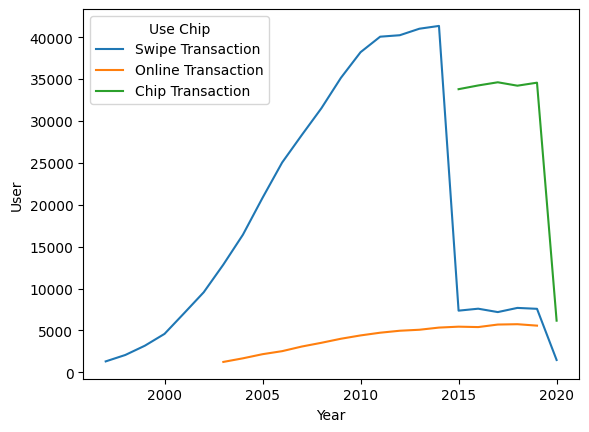

In [70]:
sns.lineplot(data=year_month_grouped_df[(year_month_grouped_df.User>1000)], x='Year', y='User',
                 hue='Use Chip')


In [71]:
credit_df_cleaned.IsFraud.value_counts(normalize=True)

0    0.998739
1    0.001261
Name: IsFraud, dtype: float64

<AxesSubplot: xlabel='Hour', ylabel='FraudRate'>

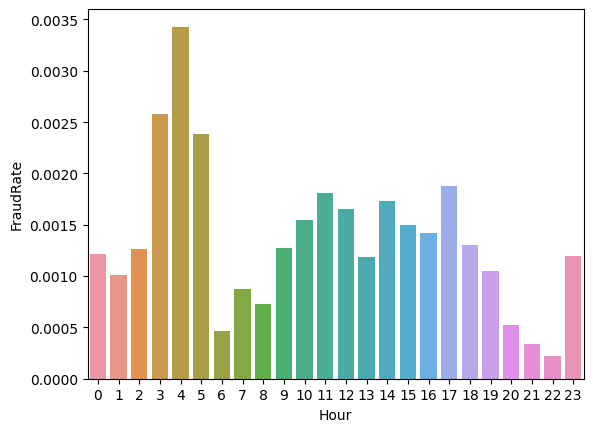

In [84]:
def get_fraud_rate(df, groupby_cols):
    
    grouped_df  = df.groupby(groupby_cols + ['IsFraud'])['User'].count().reset_index()
    total_count = df.groupby(groupby_cols)['User'].count().reset_index()
    total_count.columns = groupby_cols + ['Total']
    
    final_df = grouped_df.merge(total_count, on=groupby_cols, how="inner")
    final_df['FraudRate'] = final_df['User']/final_df['Total']
    final_df = final_df[final_df.IsFraud==1]
    
    return final_df[groupby_cols + ['FraudRate']]

sns.barplot(data=get_fraud_rate(credit_df_cleaned, ['Hour']), x='Hour', y='FraudRate')

In [ ]:
X = 